In [2]:
#importing packages
import pandas as pd
import numpy as np
import scipy as sc
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split

In [3]:
#importing data from csv files
train=pd.read_csv("/Users/karunparashar/Downloads/archive (2)/Train-1542865627584.csv")
train_beneficiary=pd.read_csv("/Users/karunparashar/Downloads/archive (2)/Train_Beneficiarydata-1542865627584.csv")
train_inpatient=pd.read_csv("/Users/karunparashar/Downloads/archive (2)/Train_Inpatientdata-1542865627584.csv")
train_outpatient=pd.read_csv("/Users/karunparashar/Downloads/archive (2)/Train_Outpatientdata-1542865627584.csv")


## cleaning and creating new features for beneficiary data

In [3]:
train_beneficiary.head(10)

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,...,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11001,1943-01-01,NaN,1,1,0,39,230,12,12,...,1,1,1,2,1,1,36000,3204,60,70
1,BENE11002,1936-09-01,NaN,2,1,0,39,280,12,12,...,2,2,2,2,2,2,0,0,30,50
2,BENE11003,1936-08-01,NaN,1,1,0,52,590,12,12,...,2,2,1,2,2,2,0,0,90,40
3,BENE11004,1922-07-01,NaN,1,1,0,39,270,12,12,...,2,1,1,1,1,2,0,0,1810,760
4,BENE11005,1935-09-01,NaN,1,1,0,24,680,12,12,...,2,1,2,2,2,2,0,0,1790,1200
5,BENE11006,1976-09-01,NaN,2,1,0,23,810,12,12,...,2,2,2,2,2,2,0,0,500,0
6,BENE11007,1940-09-01,2009-12-01,1,2,0,45,610,12,12,...,2,1,2,1,1,2,0,0,1490,160
7,BENE11008,1934-02-01,NaN,2,1,0,15,140,12,12,...,2,1,2,2,2,2,0,0,30,0
8,BENE11009,1929-06-01,NaN,1,1,Y,44,230,12,12,...,2,1,2,2,2,2,0,0,100,0
9,BENE11010,1936-07-01,NaN,2,1,0,41,30,12,12,...,2,1,1,1,2,2,0,0,1170,660


In [4]:
#checking missing values in beneficiary data
print(train_beneficiary.isna().sum())

BeneID                                  0
DOB                                     0
DOD                                137135
Gender                                  0
Race                                    0
RenalDiseaseIndicator                   0
State                                   0
County                                  0
NoOfMonths_PartACov                     0
NoOfMonths_PartBCov                     0
ChronicCond_Alzheimer                   0
ChronicCond_Heartfailure                0
ChronicCond_KidneyDisease               0
ChronicCond_Cancer                      0
ChronicCond_ObstrPulmonary              0
ChronicCond_Depression                  0
ChronicCond_Diabetes                    0
ChronicCond_IschemicHeart               0
ChronicCond_Osteoporasis                0
ChronicCond_rheumatoidarthritis         0
ChronicCond_stroke                      0
IPAnnualReimbursementAmt                0
IPAnnualDeductibleAmt                   0
OPAnnualReimbursementAmt          

Only "DOD" i.e. date of death is missing because those people are still alive.

In [5]:
#Data cleaning >> Replacing 2(no) with 0(no) for chronic diseases for better understanding of data
train_beneficiary = train_beneficiary.replace({'ChronicCond_Alzheimer': 2, 'ChronicCond_Heartfailure': 2, 'ChronicCond_KidneyDisease': 2,
                           'ChronicCond_Cancer': 2, 'ChronicCond_ObstrPulmonary': 2, 'ChronicCond_Depression': 2, 
                           'ChronicCond_Diabetes': 2, 'ChronicCond_IschemicHeart': 2, 'ChronicCond_Osteoporasis': 2, 
                           'ChronicCond_rheumatoidarthritis': 2, 'ChronicCond_stroke': 2 }, 0)

train_beneficiary = train_beneficiary.replace({'RenalDiseaseIndicator': 'Y'}, 1)


In [6]:
train_beneficiary['DOB'] = pd.to_datetime(train_beneficiary['DOB'] , format = '%Y-%m-%d')
train_beneficiary['DOD'] = pd.to_datetime(train_beneficiary['DOD'],format = '%Y-%m-%d')



#checking max date of death
train_beneficiary['DOD'].max()

Timestamp('2009-12-01 00:00:00')

We can see that last DOD is from year 2009, so we can safely assume that this dataset is last updated in 2009. We will use this year for those people who are alive and do not have DOD

In [7]:
## feature engineering >> creating age column 

train_beneficiary['Age'] = round(((train_beneficiary['DOD'] - train_beneficiary['DOB']).dt.days)/365)
train_beneficiary.Age.fillna(round(((pd.to_datetime('2009-12-01' , format = '%Y-%m-%d') - train_beneficiary['DOB']).dt.days)/365),
                                 inplace=True)


## cleaning and creating new features for inpatient data

In [8]:
train_inpatient.head(10)

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,...,NaN,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,...,25062,40390,4019,NaN,331.0,NaN,NaN,NaN,NaN,NaN
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,NaN,2009-08-13,...,5119,29620,20300,NaN,3893.0,NaN,NaN,NaN,NaN,NaN
5,BENE11017,CLM70950,2009-10-06,2009-10-12,PRV54986,8000,PHY402711,PHY402711,PHY402711,2009-10-06,...,2948,25000,25002,NaN,863.0,NaN,NaN,NaN,NaN,NaN
6,BENE11018,CLM32075,2009-01-02,2009-01-07,PRV54090,8000,PHY412314,PHY347494,NaN,2009-01-02,...,2948,2809,56210,NaN,4576.0,NaN,NaN,NaN,NaN,NaN
7,BENE11028,CLM62376,2009-08-03,2009-08-07,PRV51148,6000,PHY346286,PHY405514,NaN,2009-08-03,...,2851,4439,41401,NaN,9904.0,NaN,NaN,NaN,NaN,NaN
8,BENE11031,CLM62784,2009-08-06,2009-08-09,PRV55839,7000,PHY385030,NaN,NaN,2009-08-06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,BENE11034,CLM31519,2008-12-29,2009-01-05,PRV55215,29000,PHY355604,PHY415867,NaN,2008-12-29,...,4019,4111,4589,NaN,3612.0,4139.0,NaN,NaN,NaN,NaN


In [9]:
#checking missing values
print(train_inpatient.isna().sum())

BeneID                        0
ClaimID                       0
ClaimStartDt                  0
ClaimEndDt                    0
Provider                      0
InscClaimAmtReimbursed        0
AttendingPhysician          112
OperatingPhysician        16644
OtherPhysician            35784
AdmissionDt                   0
ClmAdmitDiagnosisCode         0
DeductibleAmtPaid           899
DischargeDt                   0
DiagnosisGroupCode            0
ClmDiagnosisCode_1            0
ClmDiagnosisCode_2          226
ClmDiagnosisCode_3          676
ClmDiagnosisCode_4         1534
ClmDiagnosisCode_5         2894
ClmDiagnosisCode_6         4838
ClmDiagnosisCode_7         7258
ClmDiagnosisCode_8         9942
ClmDiagnosisCode_9        13497
ClmDiagnosisCode_10       36547
ClmProcedureCode_1        17326
ClmProcedureCode_2        35020
ClmProcedureCode_3        39509
ClmProcedureCode_4        40358
ClmProcedureCode_5        40465
ClmProcedureCode_6        40474
dtype: int64


Operating and Other Physicians along with most of the diagnosis codes are filled with NA values. 
Imputing NA values with some meaningful information is very difficult.

In [10]:
#creating feature >> admit duration, claim duration and difference between them
train_inpatient['AdmissionDt'] = pd.to_datetime(train_inpatient['AdmissionDt'] , format = '%Y-%m-%d')
train_inpatient['DischargeDt'] = pd.to_datetime(train_inpatient['DischargeDt'],format = '%Y-%m-%d')
train_inpatient['ClaimStartDt'] = pd.to_datetime(train_inpatient['ClaimStartDt'],format = '%Y-%m-%d')
train_inpatient['ClaimEndDt'] = pd.to_datetime(train_inpatient['ClaimEndDt'],format = '%Y-%m-%d')


train_inpatient['admit_duration'] = ((train_inpatient['DischargeDt'] - train_inpatient['AdmissionDt']).dt.days)
train_inpatient['claim_duration'] = ((train_inpatient['ClaimStartDt'] - train_inpatient['ClaimEndDt']).dt.days)



#diff
train_inpatient['admit_claim_diff'] = (train_inpatient['claim_duration'] - train_inpatient['admit_duration'])


In [11]:
remove_these_columns=['OperatingPhysician', 'OtherPhysician', 'ClmDiagnosisCode_1',
       'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4',
       'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7',
       'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10',
       'ClmProcedureCode_1', 'ClmProcedureCode_2', 'ClmProcedureCode_3',
       'ClmProcedureCode_4', 'ClmProcedureCode_5', 'ClmProcedureCode_6',
       'ClmAdmitDiagnosisCode','ClaimStartDt','ClaimEndDt']

train_inpatient=train_inpatient.drop(axis=1,columns=remove_these_columns)
train_inpatient.head(10)

,BeneID,ClaimID,Provider,InscClaimAmtReimbursed,AttendingPhysician,AdmissionDt,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,admit_duration,claim_duration,admit_claim_diff
0,BENE11001,CLM46614,PRV55912,26000,PHY390922,2009-04-12,1068.0,2009-04-18,201,6,-6,-12
1,BENE11001,CLM66048,PRV55907,5000,PHY318495,2009-08-31,1068.0,2009-09-02,750,2,-2,-4
2,BENE11001,CLM68358,PRV56046,5000,PHY372395,2009-09-17,1068.0,2009-09-20,883,3,-3,-6
3,BENE11011,CLM38412,PRV52405,5000,PHY369659,2009-02-14,1068.0,2009-02-22,067,8,-8,-16
4,BENE11014,CLM63689,PRV56614,10000,PHY379376,2009-08-13,1068.0,2009-08-30,975,17,-17,-34
5,BENE11017,CLM70950,PRV54986,8000,PHY402711,2009-10-06,1068.0,2009-10-12,597,6,-6,-12
6,BENE11018,CLM32075,PRV54090,8000,PHY412314,2009-01-02,1068.0,2009-01-07,390,5,-5,-10
7,BENE11028,CLM62376,PRV51148,6000,PHY346286,2009-08-03,1068.0,2009-08-07,379,4,-4,-8
8,BENE11031,CLM62784,PRV55839,7000,PHY385030,2009-08-06,1068.0,2009-08-09,294,3,-3,-6
9,BENE11034,CLM31519,PRV55215,29000,PHY355604,2008-12-29,1068.0,2009-01-05,262,7,-7,-14


## cleaning and creating new features for outpatient data

In [12]:
train_outpatient.head(10)

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,56409
1,BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80,PHY362868,NaN,NaN,6115,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,79380
2,BENE11003,CLM438021,2009-06-27,2009-06-27,PRV57595,10,PHY328821,NaN,NaN,2723,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,BENE11004,CLM121801,2009-01-06,2009-01-06,PRV56011,40,PHY334319,NaN,NaN,71988,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
4,BENE11004,CLM150998,2009-01-22,2009-01-22,PRV56011,200,PHY403831,NaN,NaN,82382,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,71947
5,BENE11004,CLM173224,2009-02-03,2009-02-03,PRV56011,20,PHY339887,NaN,NaN,20381,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
6,BENE11004,CLM224741,2009-03-03,2009-03-03,PRV56011,40,PHY345721,NaN,NaN,V6546,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
7,BENE11004,CLM252512,2009-03-18,2009-03-18,PRV56011,200,PHY346833,NaN,PHY346833,72290,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
8,BENE11004,CLM322683,2009-04-25,2009-05-15,PRV56011,60,PHY372925,NaN,PHY311407,71856,...,71596,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
9,BENE11004,CLM339500,2009-05-04,2009-05-16,PRV56011,500,PHY412904,NaN,PHY396473,7237,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN


In [13]:
#checking missing values
print(train_outpatient.isna().sum())

BeneID                         0
ClaimID                        0
ClaimStartDt                   0
ClaimEndDt                     0
Provider                       0
InscClaimAmtReimbursed         0
AttendingPhysician          1396
OperatingPhysician        427120
OtherPhysician            322691
ClmDiagnosisCode_1         10453
ClmDiagnosisCode_2        195380
ClmDiagnosisCode_3        314480
ClmDiagnosisCode_4        392141
ClmDiagnosisCode_5        443393
ClmDiagnosisCode_6        468981
ClmDiagnosisCode_7        484776
ClmDiagnosisCode_8        494825
ClmDiagnosisCode_9        502899
ClmDiagnosisCode_10       516654
ClmProcedureCode_1        517575
ClmProcedureCode_2        517701
ClmProcedureCode_3        517733
ClmProcedureCode_4        517735
ClmProcedureCode_5        517737
ClmProcedureCode_6        517737
DeductibleAmtPaid              0
ClmAdmitDiagnosisCode     412312
dtype: int64


Operating and Other Physicians along with most of the diagnosis codes are filled with NA values. Imputing NA values with some meaningful information is very difficult.

In [14]:
#creating feature >> claim duration 
train_outpatient['ClaimStartDt'] = pd.to_datetime(train_outpatient['ClaimStartDt'],format = '%Y-%m-%d')
train_outpatient['ClaimEndDt'] = pd.to_datetime(train_outpatient['ClaimEndDt'],format = '%Y-%m-%d')



train_outpatient['claim_duration'] = ((train_outpatient['ClaimStartDt'] - train_outpatient['ClaimEndDt']).dt.days)




In [15]:
#removing irrelevent columns
remove_these_columns=['OperatingPhysician', 'OtherPhysician', 'ClmDiagnosisCode_1',
       'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4',
       'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7',
       'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10',
       'ClmProcedureCode_1', 'ClmProcedureCode_2', 'ClmProcedureCode_3',
       'ClmProcedureCode_4', 'ClmProcedureCode_5', 'ClmProcedureCode_6',
       'ClmAdmitDiagnosisCode','ClaimStartDt','ClaimEndDt']

train_outpatient=train_outpatient.drop(axis=1,columns=remove_these_columns)

In [16]:
#merging inpatient and outpatient data

train_allpatient=pd.merge(train_outpatient,train_inpatient,
                              left_on=['BeneID', 'ClaimID', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'DeductibleAmtPaid','claim_duration'],
                              right_on=['BeneID', 'ClaimID', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'DeductibleAmtPaid','claim_duration']
                              ,how='outer')


In [17]:
train_allpatient.tail(10)

,BeneID,ClaimID,Provider,InscClaimAmtReimbursed,AttendingPhysician,DeductibleAmtPaid,claim_duration,AdmissionDt,DischargeDt,DiagnosisGroupCode,admit_duration,admit_claim_diff
558201,BENE159151,CLM73572,PRV51038,3000,PHY414890,1068.0,-6,2009-10-26,2009-11-01,165,6.0,-12.0
558202,BENE159160,CLM40874,PRV51040,6000,PHY389602,1068.0,-2,2009-03-02,2009-03-04,250,2.0,-4.0
558203,BENE159166,CLM38690,PRV51440,11000,PHY393635,NaN,-2,2009-02-16,2009-02-18,234,2.0,-4.0
558204,BENE159166,CLM38985,PRV51812,6000,PHY430902,1068.0,-7,2009-02-18,2009-02-25,183,7.0,-14.0
558205,BENE159167,CLM35741,PRV53671,4000,PHY345332,1068.0,-2,2009-01-27,2009-01-29,748,2.0,-4.0
558206,BENE159167,CLM69886,PRV53671,7000,PHY345332,1068.0,-4,2009-09-28,2009-10-02,812,4.0,-8.0
558207,BENE159175,CLM74504,PRV54981,4000,PHY342806,1068.0,-3,2009-11-03,2009-11-06,228,3.0,-6.0
558208,BENE159177,CLM76485,PRV56588,3000,PHY423220,1068.0,-4,2009-11-18,2009-11-22,302,4.0,-8.0
558209,BENE159177,CLM79949,PRV56575,5000,PHY353156,1068.0,-1,2009-12-17,2009-12-18,309,1.0,-2.0
558210,BENE159188,CLM69948,PRV54765,15000,PHY431177,1068.0,-8,2009-09-28,2009-10-06,340,8.0,-16.0


In [18]:
## merging all patient data with beneficiary data
train_pdd=pd.merge(train_allpatient,train_beneficiary,left_on='BeneID',right_on='BeneID',how='inner')

In [19]:
## getting fraud/non fraud label with whole data
train_pdd=pd.merge(train,train_pdd,on='Provider')

In [20]:
train_pdd.head(10)

,Provider,PotentialFraud,BeneID,ClaimID,InscClaimAmtReimbursed,AttendingPhysician,DeductibleAmtPaid,claim_duration,AdmissionDt,DischargeDt,...,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age
0,PRV51001,No,BENE11727,CLM733300,20,PHY383007,0.0,0,NaT,NaT,...,1,1,0,0,0,0,0,300,110,80.0
1,PRV51001,No,BENE24646,CLM372475,700,PHY405682,0.0,-1,NaT,NaT,...,1,1,1,0,1,0,0,720,10,67.0
2,PRV51001,No,BENE31617,CLM748221,900,PHY345302,0.0,0,NaT,NaT,...,1,1,0,1,0,0,0,1380,370,76.0
3,PRV51001,No,BENE32715,CLM272936,500,PHY318842,0.0,-1,NaT,NaT,...,1,1,0,0,0,2020,1068,6700,2700,74.0
4,PRV51001,No,BENE36012,CLM58316,36000,PHY340163,1068.0,-4,2009-07-04,2009-07-08,...,1,1,0,0,1,36000,1068,3520,140,69.0
5,PRV51001,No,BENE38773,CLM52334,12000,PHY346762,1068.0,-2,2009-05-23,2009-05-25,...,0,0,0,0,0,95000,2136,2270,900,72.0
6,PRV51001,No,BENE49220,CLM452024,70,PHY402512,0.0,0,NaT,NaT,...,0,1,1,0,0,5000,1068,370,70,91.0
7,PRV51001,No,BENE56354,CLM403535,100,PHY350459,0.0,0,NaT,NaT,...,0,0,1,0,0,0,0,320,80,90.0
8,PRV51001,No,BENE57060,CLM578620,300,PHY311126,0.0,0,NaT,NaT,...,1,1,0,0,0,0,0,630,130,57.0
9,PRV51001,No,BENE61975,CLM260292,60,PHY392882,0.0,0,NaT,NaT,...,1,1,0,0,0,0,0,1590,1070,98.0


## EDA

Text(0, 0.5, 'Number of Provider per Class ')

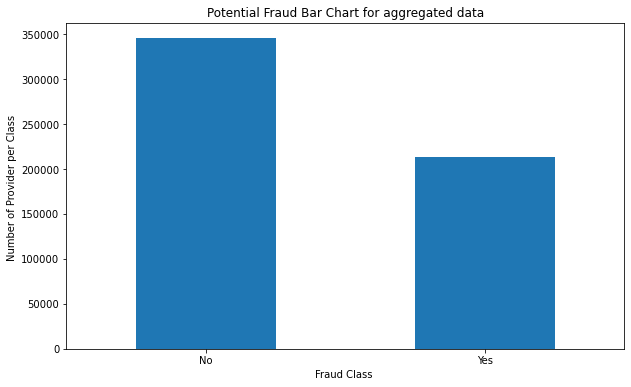

In [21]:
classes = pd.value_counts(train_pdd['PotentialFraud'], sort = True)
classes.plot(kind = 'bar', rot=0,figsize=(10,6))

#Giving titles and labels to the plot
plt.title("Potential Fraud Bar Chart for aggregated data")
plt.xlabel("Fraud Class ")
plt.ylabel("Number of Provider per Class ")

Observation:
1. Number of cases of non-fraudulent transaction are around 35000.
2. Number of cases of fraudulent transaction are around 22000.
3. As this is the aggregated data for each transaction of a beneficiary, number of fraudulent transactions are slightly higher than expected because the single healthcare provider is performing fraud with multiple beneficiaries.

Text(0, 0.5, 'Number of Provider per Class ')

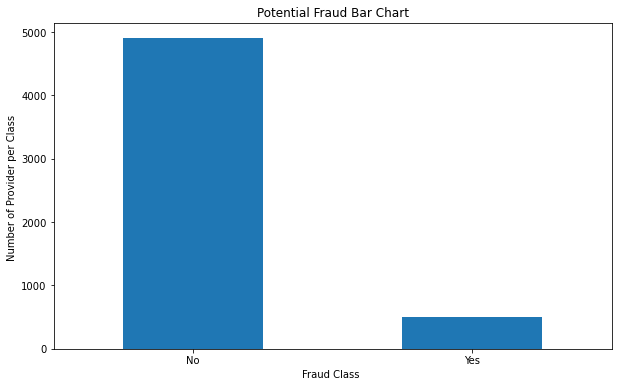

In [22]:
classes = pd.value_counts(train['PotentialFraud'], sort = True)
classes.plot(kind = 'bar', rot=0,figsize=(10,6))

#Giving titles and labels to the plot
plt.title("Potential Fraud Bar Chart")
plt.xlabel("Fraud Class ")
plt.ylabel("Number of Provider per Class ")

Observation:
1. The number of providers who do not have a single case of fraud registered against them is approximately 5000.
2. The number of providers who have a case of fraud registered against them is approximately 500.
3. The ratio of non-fraudulent to fraudulent providers is around 10:1  

Text(0, 0.5, 'Number of Beneficiary')

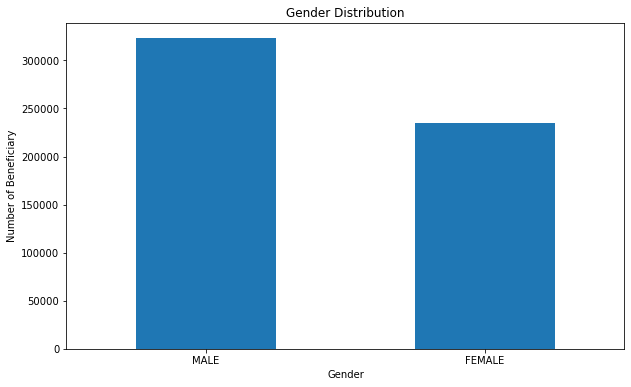

In [23]:
#gender
classes = pd.value_counts(train_pdd['Gender'], sort = True)
classes.plot(kind = 'bar', rot=0,figsize=(10,6))

#Giving titles and labels to the plot
plt.title("Gender Distribution")
plt.xticks(range(2), ['MALE','FEMALE'])
plt.xlabel("Gender")
plt.ylabel("Number of Beneficiary")

Observation:
1. Number of male beneficiaries is around 32000.
2. Number of female beneficiaries is around 24000.

Text(0.5, 0, 'Age')

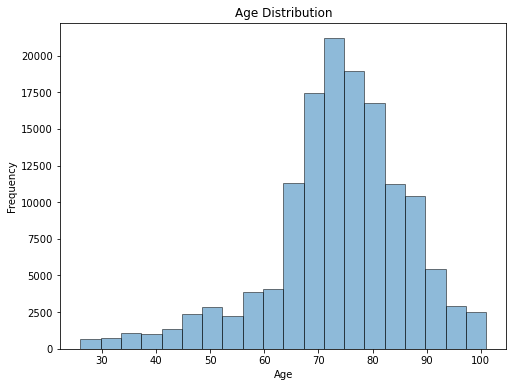

In [24]:
## Age Distribution
ax = train_beneficiary['Age'].plot.hist(bins=20, alpha=0.5, figsize=(8, 6), edgecolor='k')
#Giving titles and labels to the plot
plt.title("Age Distribution")
plt.xlabel("Age")



Observation:
1. As the critical age is between 60 to 100, this distribution is right tailed.
2. Average age of the beneficiares is around 72 which makes sense because many chronic health problems are common at this age.

Text(0, 0.5, 'Number of Beneficiary')

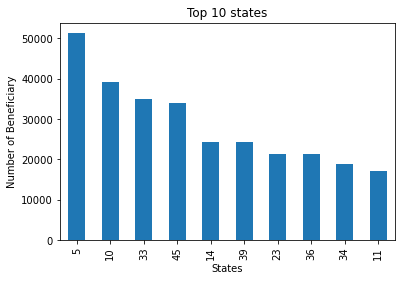

In [25]:
#TOP 10 states
count_States = pd.value_counts(train_pdd['State'], sort = True).head(10)
count_States.plot(x ='State', y='Count', kind = 'bar')


plt.title("Top 10 states")
plt.xlabel("States")
plt.ylabel("Number of Beneficiary")

Obseravtion:
1. Among the top 10 states, state 5 has the highest number of beneficiaries i.e 50000.
2. State 11 has around 18000 beneficiaries.
3. Chances of more fraudulent transactions increases where the number of people who are seeking help from healthcare providers are more.

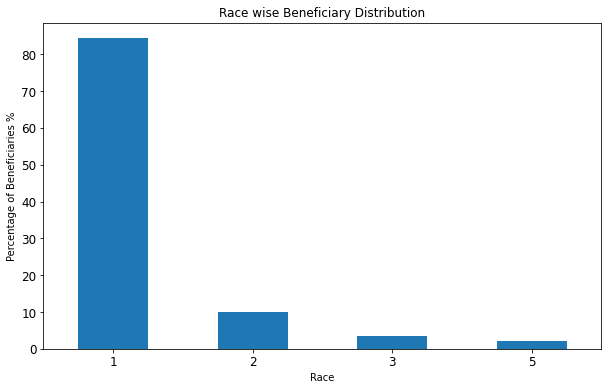

In [26]:
#Race
count_Race = pd.value_counts(train_pdd['Race'], sort = True)

#Drawing a barplot
(count_Race*100/len(train_pdd)).plot(kind = 'bar', rot=0,figsize=(10,6),fontsize=12)

#Giving titles and labels to the plot
plt.title("Race wise Beneficiary Distribution")
plt.xlabel("Race")
plt.ylabel("Percentage of Beneficiaries "'%')
plt.show()

Observation:
1. Race 1 has highest number of beneficiaries.
2. Race 5 has lowest number of beneficiaries.
3. There are no entries for Race 4.

Text(0, 0.5, ' Number of Beneficiaries')

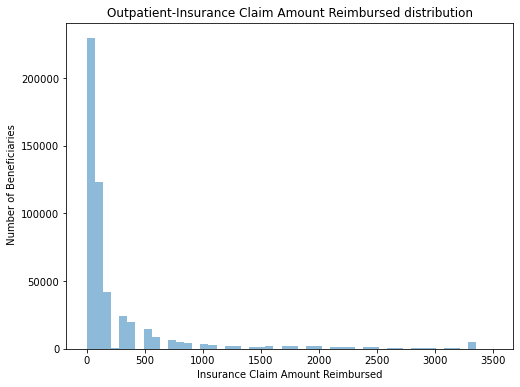

In [27]:
#trend for Insurance Claim Reimbursed Amount for outpatient
ax = train_outpatient['InscClaimAmtReimbursed'].plot.hist(bins=50,range=[0, 3500], alpha=0.5,figsize=(8, 6))
#Giving titles and labels to the plot
plt.title("Outpatient-Insurance Claim Amount Reimbursed distribution")
plt.xlabel("Insurance Claim Amount Reimbursed")
plt.ylabel(" Number of Beneficiaries")

Observation:
1. For the patients who were not admitted, claim amount reimbursed is very low.
2. Logically, there are more chances for fraud when the amount reimbursed is high. Therefore, chances of fraudulent activities in outpatient data is very low.

Text(0, 0.5, ' Number of Beneficiaries')

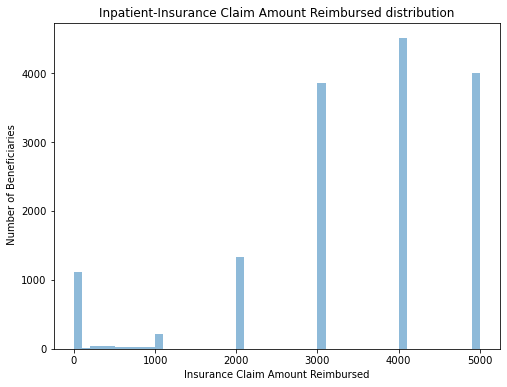

In [28]:
#trend for Insurance Claim Reimbursed Amount for inpatient
ax = train_inpatient['InscClaimAmtReimbursed'].plot.hist(bins=50,range=[0, 5000], alpha=0.5,figsize=(8, 6))
#Giving titles and labels to the plot
plt.title("Inpatient-Insurance Claim Amount Reimbursed distribution")
plt.xlabel("Insurance Claim Amount Reimbursed")
plt.ylabel(" Number of Beneficiaries")

Observation:
1. For inpatient data, claim amount reimbursed is very high as there were proper diagnosis performed.
2. Naturally, probability of fraud happening in the case of patients who were admitted might be high.

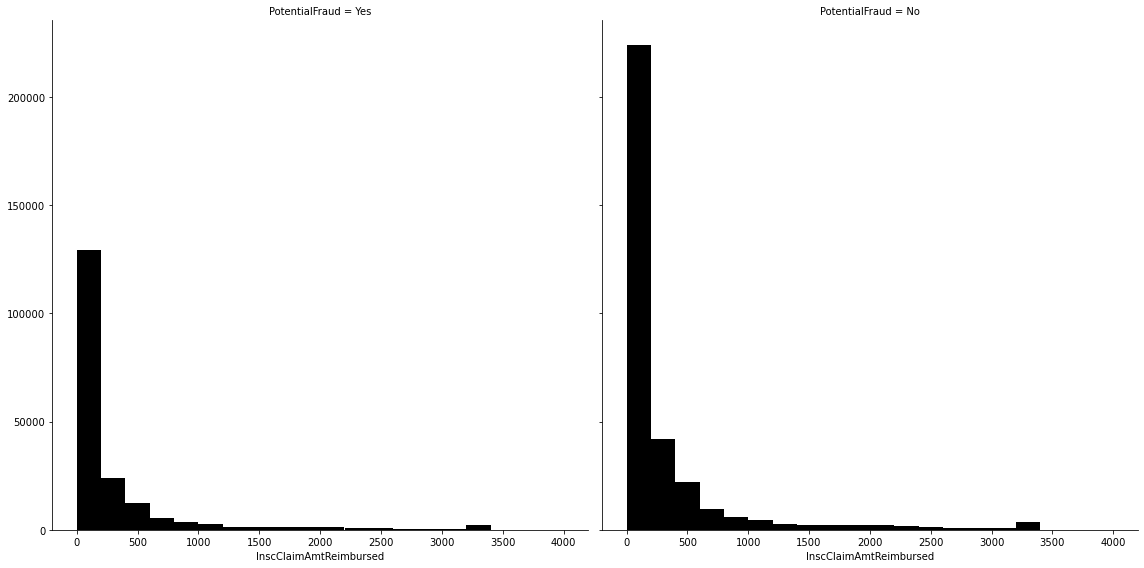

In [29]:
#trend for Insurance Claim Reimbursed Amount with class labels for outpatient
to_merge = pd.merge(train_outpatient, train, how='inner', on='Provider')
g = sns.FacetGrid(to_merge, col='PotentialFraud', height=8)
g.map(plt.hist, 'InscClaimAmtReimbursed', bins=20, range=[0, 4000], color ='k')

Observation:
1. For the patients who were not admitted and there was a fraudulent activity detected, number of patients with with high reimbursement amount are more in terms of absolute percentage.

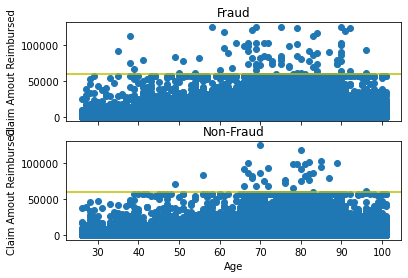

In [30]:
#Insurance Claim Amount Reimbursed Vs Age
f, (x1, x2) = plt.subplots(2, 1, sharex=True)

x1.scatter(train_pdd[train_pdd.PotentialFraud=='Yes'].Age, 
            train_pdd[train_pdd.PotentialFraud=='Yes'].InscClaimAmtReimbursed)
x1.set_title('Fraud')
x1.axhline(y=60000,c='y')
x1.set_ylabel('Claim Amout Reimbursed')

x2.scatter(train_pdd[train_pdd.PotentialFraud=='No'].Age, 
            train_pdd[train_pdd.PotentialFraud=='No'].InscClaimAmtReimbursed)
x2.set_title('Non-Fraud')
x2.axhline(y=60000,c='y')
x2.set_xlabel('Age')
x2.set_ylabel('Claim Amout Reimbursed')

plt.show()

Observation:
1. For the patients with age>60, when the reimbursement amount>60000, percentage of fraudulent activity is high.
2. It is quite evident that as the claim amount reimbursed is high, probability of fraud increases.

## Feature Engineering

New features on provider level

In [31]:
train_pdd["ppa_InscClaimAmtReimbursed"]=train_pdd.groupby('Provider')['InscClaimAmtReimbursed'].transform('mean')
train_pdd["ppa_DeductibleAmtPaid"]=train_pdd.groupby('Provider')['DeductibleAmtPaid'].transform('mean')
train_pdd["ppa_IPAnnualReimbursementAmt"]=train_pdd.groupby('Provider')['IPAnnualReimbursementAmt'].transform('mean')
train_pdd["ppa_IPAnnualDeductibleAmt"]=train_pdd.groupby('Provider')['IPAnnualDeductibleAmt'].transform('mean')
train_pdd["ppa_OPAnnualReimbursementAmt"]=train_pdd.groupby('Provider')['OPAnnualReimbursementAmt'].transform('mean')
train_pdd["Pppa_OPAnnualDeductibleAmt"]=train_pdd.groupby('Provider')['OPAnnualDeductibleAmt'].transform('mean')
train_pdd["ppa_Age"]=train_pdd.groupby('Provider')['Age'].transform('mean')
train_pdd["ppa_admit_duration"]=train_pdd.groupby('Provider')['admit_duration'].transform('mean')
train_pdd["ppa_claim_duration"]=train_pdd.groupby('Provider')['claim_duration'].transform('mean')
train_pdd["ppa_admit_claim_diff"]=train_pdd.groupby('Provider')['admit_claim_diff'].transform('mean')

In [32]:
train_pdd.head()

,Provider,PotentialFraud,BeneID,ClaimID,InscClaimAmtReimbursed,AttendingPhysician,DeductibleAmtPaid,claim_duration,AdmissionDt,DischargeDt,...,ppa_InscClaimAmtReimbursed,ppa_DeductibleAmtPaid,ppa_IPAnnualReimbursementAmt,ppa_IPAnnualDeductibleAmt,ppa_OPAnnualReimbursementAmt,Pppa_OPAnnualDeductibleAmt,ppa_Age,ppa_admit_duration,ppa_claim_duration,ppa_admit_claim_diff
0,PRV51001,No,BENE11727,CLM733300,20,PHY383007,0.0,0,NaT,NaT,...,4185.6,213.6,17606.0,897.12,2615.2,463.92,78.84,5.0,-1.44,-10.0
1,PRV51001,No,BENE24646,CLM372475,700,PHY405682,0.0,-1,NaT,NaT,...,4185.6,213.6,17606.0,897.12,2615.2,463.92,78.84,5.0,-1.44,-10.0
2,PRV51001,No,BENE31617,CLM748221,900,PHY345302,0.0,0,NaT,NaT,...,4185.6,213.6,17606.0,897.12,2615.2,463.92,78.84,5.0,-1.44,-10.0
3,PRV51001,No,BENE32715,CLM272936,500,PHY318842,0.0,-1,NaT,NaT,...,4185.6,213.6,17606.0,897.12,2615.2,463.92,78.84,5.0,-1.44,-10.0
4,PRV51001,No,BENE36012,CLM58316,36000,PHY340163,1068.0,-4,2009-07-04,2009-07-08,...,4185.6,213.6,17606.0,897.12,2615.2,463.92,78.84,5.0,-1.44,-10.0


New features on physician level

In [33]:
train_pdd["Per_apa_InscClaimAmtReimbursed"]=train_pdd.groupby('AttendingPhysician')['InscClaimAmtReimbursed'].transform('mean')
train_pdd["Per_apa_DeductibleAmtPaid"]=train_pdd.groupby('AttendingPhysician')['DeductibleAmtPaid'].transform('mean')
train_pdd["Per_apa_IPAnnualReimbursementAmt"]=train_pdd.groupby('AttendingPhysician')['IPAnnualReimbursementAmt'].transform('mean')
train_pdd["Per_apa_IPAnnualDeductibleAmt"]=train_pdd.groupby('AttendingPhysician')['IPAnnualDeductibleAmt'].transform('mean')
train_pdd["Per_apa_OPAnnualReimbursementAmt"]=train_pdd.groupby('AttendingPhysician')['OPAnnualReimbursementAmt'].transform('mean')
train_pdd["Per_apa_OPAnnualDeductibleAmt"]=train_pdd.groupby('AttendingPhysician')['OPAnnualDeductibleAmt'].transform('mean')
train_pdd["Per_apa_Age"]=train_pdd.groupby('AttendingPhysician')['Age'].transform('mean')
train_pdd["Per_apa_admit_duration"]=train_pdd.groupby('AttendingPhysician')['admit_duration'].transform('mean')
train_pdd["PPer_apa_claim_duration"]=train_pdd.groupby('AttendingPhysician')['claim_duration'].transform('mean')
train_pdd["Per_apa_admit_claim_diff"]=train_pdd.groupby('AttendingPhysician')['admit_claim_diff'].transform('mean')

In [34]:
train_pdd = train_pdd.fillna(0)

## Modeling

In [35]:
train_pdd.head(10)

,Provider,PotentialFraud,BeneID,ClaimID,InscClaimAmtReimbursed,AttendingPhysician,DeductibleAmtPaid,claim_duration,AdmissionDt,DischargeDt,...,Per_apa_InscClaimAmtReimbursed,Per_apa_DeductibleAmtPaid,Per_apa_IPAnnualReimbursementAmt,Per_apa_IPAnnualDeductibleAmt,Per_apa_OPAnnualReimbursementAmt,Per_apa_OPAnnualDeductibleAmt,Per_apa_Age,Per_apa_admit_duration,PPer_apa_claim_duration,Per_apa_admit_claim_diff
0,PRV51001,No,BENE11727,CLM733300,20,PHY383007,0.0,0,0,0,...,20.000000,0.000000,0.000000,0.000000,300.000000,110.000000,80.000000,0.0,0.000000,0.0
1,PRV51001,No,BENE24646,CLM372475,700,PHY405682,0.0,-1,0,0,...,300.000000,26.666667,0.000000,0.000000,1703.333333,286.666667,65.000000,0.0,-0.333333,0.0
2,PRV51001,No,BENE31617,CLM748221,900,PHY345302,0.0,0,0,0,...,647.500000,0.000000,0.000000,0.000000,1932.500000,220.000000,75.000000,0.0,0.000000,0.0
3,PRV51001,No,BENE32715,CLM272936,500,PHY318842,0.0,-1,0,0,...,500.000000,0.000000,2020.000000,1068.000000,6700.000000,2700.000000,74.000000,0.0,-1.000000,0.0
4,PRV51001,No,BENE36012,CLM58316,36000,PHY340163,1068.0,-4,2009-07-04 00:00:00,2009-07-08 00:00:00,...,36000.000000,1068.000000,36000.000000,1068.000000,3520.000000,140.000000,69.000000,4.0,-4.000000,-8.0
5,PRV51001,No,BENE38773,CLM52334,12000,PHY346762,1068.0,-2,2009-05-23 00:00:00,2009-05-25 00:00:00,...,12000.000000,1068.000000,95000.000000,2136.000000,2270.000000,900.000000,72.000000,2.0,-2.000000,-4.0
6,PRV51001,No,BENE49220,CLM452024,70,PHY402512,0.0,0,0,0,...,190.000000,0.000000,11540.000000,2136.000000,6006.666667,639.333333,79.666667,0.0,0.000000,0.0
7,PRV51001,No,BENE56354,CLM403535,100,PHY350459,0.0,0,0,0,...,458.571429,0.000000,3202.857143,457.714286,2782.857143,475.714286,87.000000,0.0,-2.000000,0.0
8,PRV51001,No,BENE57060,CLM578620,300,PHY311126,0.0,0,0,0,...,300.000000,0.000000,0.000000,0.000000,630.000000,130.000000,57.000000,0.0,0.000000,0.0
9,PRV51001,No,BENE61975,CLM260292,60,PHY392882,0.0,0,0,0,...,80.000000,0.000000,0.000000,0.000000,1125.000000,1020.000000,83.500000,0.0,0.000000,0.0


In [36]:
# removing unwanted columns
remove_these_columns=['BeneID', 'ClaimID','AttendingPhysician','DOB', 'DOD','State', 'County']

train_pdd=train_pdd.drop(axis=1,columns=remove_these_columns)

In [37]:
# converting datatype

train_pdd.Gender=train_pdd.Gender.astype('category')

train_pdd.Race=train_pdd.Race.astype('category')

In [38]:
# one hot encoding
train_pdd=pd.get_dummies(train_pdd,columns=['Gender','Race'],drop_first=True)

In [39]:
# converting target variable to int
train_pdd.PotentialFraud.replace(['Yes','No'],['1','0'],inplace=True)

train_pdd.PotentialFraud=train_pdd.PotentialFraud.astype('int64')

In [40]:
train_pdd.head()

,Provider,PotentialFraud,InscClaimAmtReimbursed,DeductibleAmtPaid,claim_duration,AdmissionDt,DischargeDt,DiagnosisGroupCode,admit_duration,admit_claim_diff,...,Per_apa_OPAnnualReimbursementAmt,Per_apa_OPAnnualDeductibleAmt,Per_apa_Age,Per_apa_admit_duration,PPer_apa_claim_duration,Per_apa_admit_claim_diff,Gender_2,Race_2,Race_3,Race_5
0,PRV51001,0,20,0.0,0,0,0,0,0.0,0.0,...,300.000000,110.000000,80.0,0.0,0.000000,0.0,0,0,0,0
1,PRV51001,0,700,0.0,-1,0,0,0,0.0,0.0,...,1703.333333,286.666667,65.0,0.0,-0.333333,0.0,0,0,0,0
2,PRV51001,0,900,0.0,0,0,0,0,0.0,0.0,...,1932.500000,220.000000,75.0,0.0,0.000000,0.0,1,0,0,0
3,PRV51001,0,500,0.0,-1,0,0,0,0.0,0.0,...,6700.000000,2700.000000,74.0,0.0,-1.000000,0.0,0,0,0,0
4,PRV51001,0,36000,1068.0,-4,2009-07-04 00:00:00,2009-07-08 00:00:00,882,4.0,-8.0,...,3520.000000,140.000000,69.0,4.0,-4.000000,-8.0,0,0,0,0


In [41]:
#aggregating to provider level

train_pdd = train_pdd.groupby(['Provider','PotentialFraud'],as_index=False).agg('sum')

In [42]:
# Removing provider ID
X=train_pdd.drop(axis=1,columns=['Provider','PotentialFraud'])
y=train_pdd['PotentialFraud']

In [43]:
# scaling
sc = StandardScaler()   
sc.fit(X)
X_std = sc.transform(X)

In [44]:
# Splitting into train and test
X_train,X_test,y_train,y_test = train_test_split(X_std,y,test_size=0.3,random_state=123,stratify=y,shuffle=True)

In [45]:
#Random forest
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=500,class_weight='balanced',random_state=123,max_depth=4)
rfc.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced', max_depth=4, n_estimators=500,
                       random_state=123)

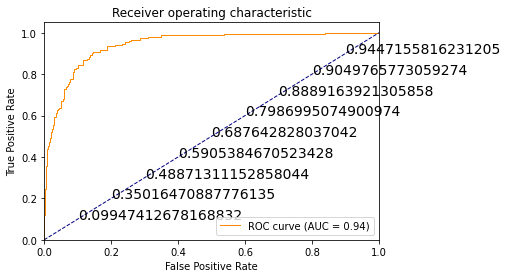

In [46]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, rfc.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (AUC = %0.2f)' % roc_auc)

for label in range(1,10,1):
    plt.text((10-label)/10,(10-label)/10,thresholds[label*15],fontdict={'size': 14})
    
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [47]:
rfc_train_pred = (rfc.predict_proba(X_train)[:,1]>0.5).astype(bool)  
rfc_test_pred = (rfc.predict_proba(X_test)[:,1]>0.5).astype(bool) 

In [48]:
from sklearn.metrics import confusion_matrix,accuracy_score,cohen_kappa_score,roc_auc_score,f1_score,roc_curve

cm0 = confusion_matrix(y_train, rfc_train_pred,labels=[1,0])
print('Confusion Matrix Train : \n', cm0)

cm1 = confusion_matrix(y_test, rfc_test_pred,labels=[1,0])
print('Confusion Matrix Test: \n', cm1)

total0=sum(sum(cm0))
total1=sum(sum(cm1))
#####from confusion matrix calculate accuracy
accuracy0=(cm0[0,0]+cm0[1,1])/total0
print ('Accuracy Train : ', accuracy0)

accuracy1=(cm1[0,0]+cm1[1,1])/total1
print ('Accuracy Test : ', accuracy1)

sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', specificity1)

KappaValue=cohen_kappa_score(y_test, rfc_test_pred)
print("Kappa Value :",KappaValue)
AUC=roc_auc_score(y_test, rfc_test_pred)
print("AUC         :",AUC)


print("F1-Score Train",f1_score(y_train,rfc_train_pred))
print("F1-Score Validation : ",f1_score(y_test, rfc_test_pred))


Confusion Matrix Train : 
 [[ 319   35]
 [ 420 3013]]
Confusion Matrix Test: 
 [[ 134   18]
 [ 195 1276]]
Accuracy Train :  0.8798521256931608
Accuracy Test :  0.8687615526802218
Sensitivity :  0.881578947368421
Specificity :  0.86743711760707
Kappa Value : 0.4921023673064011
AUC         : 0.8745080324877456
F1-Score Train 0.5837145471180238
F1-Score Validation :  0.5571725571725572


Text(0.5, 1.0, 'Most important Features')

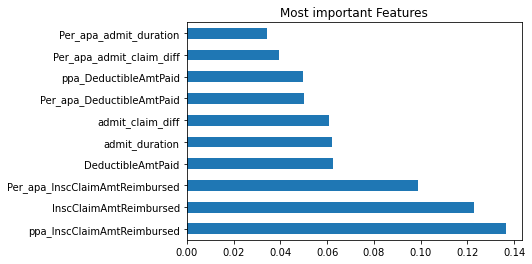

In [49]:
feat_importance = pd.Series(rfc.feature_importances_, index=X.columns)
feat_importance.nlargest(10).plot(kind='barh')
plt.title("Most important Features")

Text(0.5, 1.0, 'Least important Features')

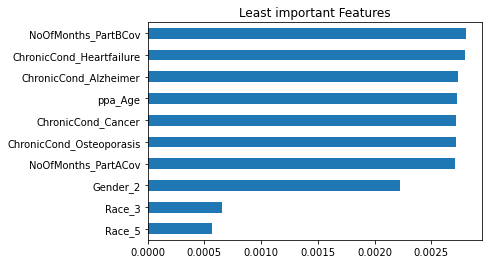

In [50]:
feat_importance = pd.Series(rfc.feature_importances_, index=X.columns)
feat_importance.nsmallest(10).plot(kind='barh')
plt.title("Least important Features")

In [51]:
#Logistic regression 
from sklearn.linear_model import LogisticRegression
log=LogisticRegression()
log.fit(X_train,y_train)


/Users/karunparashar/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

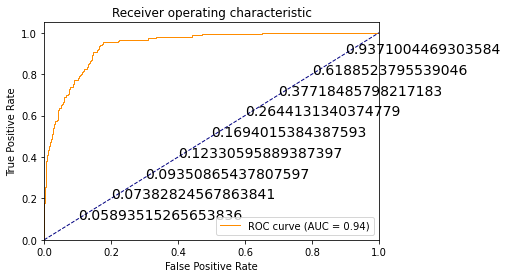

In [52]:
fpr, tpr, thresholds = roc_curve(y_test, log.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (AUC = %0.2f)' % roc_auc)

for label in range(1,10,1):
    plt.text((10-label)/10,(10-label)/10,thresholds[label*15],fontdict={'size': 14})
    
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [53]:
log_train_pred = (log.predict_proba(X_train)[:,1]>0.5).astype(bool)  
log_test_pred = (log.predict_proba(X_test)[:,1]>0.5).astype(bool) 

In [54]:
cm0 = confusion_matrix(y_train, log_train_pred,labels=[1,0])
print('Confusion Matrix Train : \n', cm0)

cm1 = confusion_matrix(y_test, log_test_pred,labels=[1,0])
print('Confusion Matrix Test: \n', cm1)

total0=sum(sum(cm0))
total1=sum(sum(cm1))
#####from confusion matrix calculate accuracy
accuracy0=(cm0[0,0]+cm0[1,1])/total0
print ('Accuracy Train : ', accuracy0)

accuracy1=(cm1[0,0]+cm1[1,1])/total1
print ('Accuracy Test : ', accuracy1)

sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', specificity1)

KappaValue=cohen_kappa_score(y_test, log_test_pred)
print("Kappa Value :",KappaValue)
AUC=roc_auc_score(y_test, log_test_pred)
print("AUC         :",AUC)


print("F1-Score Train",f1_score(y_train,log_train_pred))
print("F1-Score Validation : ",f1_score(y_test, log_test_pred))


Confusion Matrix Train : 
 [[ 159  195]
 [  49 3384]]
Confusion Matrix Test: 
 [[  69   83]
 [  23 1448]]
Accuracy Train :  0.9355690520200687
Accuracy Test :  0.9346888478126926
Sensitivity :  0.45394736842105265
Specificity :  0.9843643779741672
Kappa Value : 0.5325613241894991
AUC         : 0.71915587319761
F1-Score Train 0.5658362989323844
F1-Score Validation :  0.5655737704918034


In [55]:
#Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(n_estimators=500,random_state=123,max_depth=4)
gbc.fit(X_train,y_train)


GradientBoostingClassifier(max_depth=4, n_estimators=500, random_state=123)

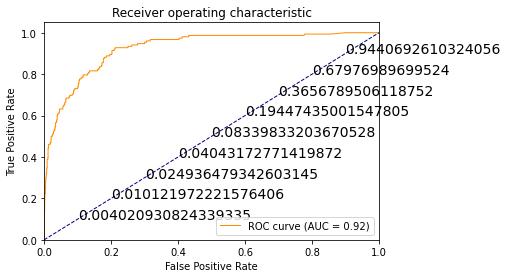

In [56]:
fpr, tpr, thresholds = roc_curve(y_test, gbc.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (AUC = %0.2f)' % roc_auc)

for label in range(1,10,1):
    plt.text((10-label)/10,(10-label)/10,thresholds[label*15],fontdict={'size': 14})
    
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [57]:
gbc_train_pred = (gbc.predict_proba(X_train)[:,1]>0.5).astype(bool)  
gbc_test_pred = (gbc.predict_proba(X_test)[:,1]>0.5).astype(bool) 

In [58]:
cm0 = confusion_matrix(y_train, gbc_train_pred,labels=[1,0])
print('Confusion Matrix Train : \n', cm0)

cm1 = confusion_matrix(y_test, gbc_test_pred,labels=[1,0])
print('Confusion Matrix Test: \n', cm1)

total0=sum(sum(cm0))
total1=sum(sum(cm1))
#####from confusion matrix calculate accuracy
accuracy0=(cm0[0,0]+cm0[1,1])/total0
print ('Accuracy Train : ', accuracy0)

accuracy1=(cm1[0,0]+cm1[1,1])/total1
print ('Accuracy Test : ', accuracy1)

sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', specificity1)

KappaValue=cohen_kappa_score(y_test, gbc_test_pred)
print("Kappa Value :",KappaValue)
AUC=roc_auc_score(y_test, gbc_test_pred)
print("AUC         :",AUC)


print("F1-Score Train",f1_score(y_train,gbc_train_pred))
print("F1-Score Validation : ",f1_score(y_test, gbc_test_pred))


Confusion Matrix Train : 
 [[ 354    0]
 [   0 3433]]
Confusion Matrix Test: 
 [[  74   78]
 [  30 1441]]
Accuracy Train :  1.0
Accuracy Test :  0.933456561922366
Sensitivity :  0.4868421052631579
Specificity :  0.9796057104010877
Kappa Value : 0.5433790430143381
AUC         : 0.7332239078321228
F1-Score Train 1.0
F1-Score Validation :  0.578125


In [59]:
#Random Forest with n_estimator=200 , max_depth=7
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=200,class_weight='balanced',random_state=123,max_depth=7)
rfc.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced', max_depth=7, n_estimators=200,
                       random_state=123)

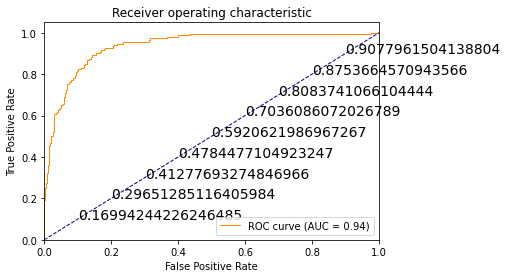

In [60]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, rfc.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (AUC = %0.2f)' % roc_auc)

for label in range(1,10,1):
    plt.text((10-label)/10,(10-label)/10,thresholds[label*15],fontdict={'size': 14})
    
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [76]:
rfc_train_pred = (rfc.predict_proba(X_train)[:,1]>0.5).astype(bool)  
rfc_test_pred = (rfc.predict_proba(X_test)[:,1]>0.5).astype(bool) 

In [77]:
from sklearn.metrics import classification_report
print(classification_report(y_test, rfc_test_pred))


              precision    recall  f1-score   support

           0       0.99      0.87      0.92      1471
           1       0.41      0.88      0.56       152

    accuracy                           0.87      1623
   macro avg       0.70      0.87      0.74      1623
weighted avg       0.93      0.87      0.89      1623



In [62]:
from sklearn.metrics import confusion_matrix,accuracy_score,cohen_kappa_score,roc_auc_score,f1_score,roc_curve

cm0 = confusion_matrix(y_train, rfc_train_pred,labels=[1,0])
print('Confusion Matrix Train : \n', cm0)

cm1 = confusion_matrix(y_test, rfc_test_pred,labels=[1,0])
print('Confusion Matrix Test: \n', cm1)

total0=sum(sum(cm0))
total1=sum(sum(cm1))
#####from confusion matrix calculate accuracy
accuracy0=(cm0[0,0]+cm0[1,1])/total0
print ('Accuracy Train : ', accuracy0)

accuracy1=(cm1[0,0]+cm1[1,1])/total1
print ('Accuracy Test : ', accuracy1)

sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', specificity1)

KappaValue=cohen_kappa_score(y_test, rfc_test_pred)
print("Kappa Value :",KappaValue)
AUC=roc_auc_score(y_test, rfc_test_pred)
print("AUC         :",AUC)


print("F1-Score Train",f1_score(y_train,rfc_train_pred))
print("F1-Score Validation : ",f1_score(y_test, rfc_test_pred))


Confusion Matrix Train : 
 [[ 343   11]
 [ 224 3209]]
Confusion Matrix Test: 
 [[ 116   36]
 [ 111 1360]]
Accuracy Train :  0.9379456033799841
Accuracy Test :  0.9094269870609981
Sensitivity :  0.7631578947368421
Specificity :  0.9245411284840245
Kappa Value : 0.5631256763759616
AUC         : 0.8438495116104332
F1-Score Train 0.744842562432139
F1-Score Validation :  0.612137203166227


In [63]:
#Random Forest with n_estimator=800 , max_depth=10
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=800,class_weight='balanced',random_state=123,max_depth=10)
rfc.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced', max_depth=10, n_estimators=800,
                       random_state=123)

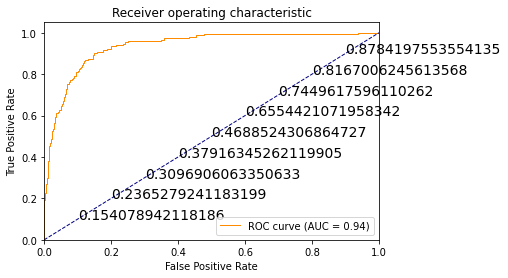

In [64]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, rfc.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (AUC = %0.2f)' % roc_auc)

for label in range(1,10,1):
    plt.text((10-label)/10,(10-label)/10,thresholds[label*15],fontdict={'size': 14})
    
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [65]:
rfc_train_pred = (rfc.predict_proba(X_train)[:,1]>0.5).astype(bool)  
rfc_test_pred = (rfc.predict_proba(X_test)[:,1]>0.5).astype(bool) 

In [66]:
from sklearn.metrics import confusion_matrix,accuracy_score,cohen_kappa_score,roc_auc_score,f1_score,roc_curve

cm0 = confusion_matrix(y_train, rfc_train_pred,labels=[1,0])
print('Confusion Matrix Train : \n', cm0)

cm1 = confusion_matrix(y_test, rfc_test_pred,labels=[1,0])
print('Confusion Matrix Test: \n', cm1)

total0=sum(sum(cm0))
total1=sum(sum(cm1))
#####from confusion matrix calculate accuracy
accuracy0=(cm0[0,0]+cm0[1,1])/total0
print ('Accuracy Train : ', accuracy0)

accuracy1=(cm1[0,0]+cm1[1,1])/total1
print ('Accuracy Test : ', accuracy1)

sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', specificity1)

KappaValue=cohen_kappa_score(y_test, rfc_test_pred)
print("Kappa Value :",KappaValue)
AUC=roc_auc_score(y_test, rfc_test_pred)
print("AUC         :",AUC)


print("F1-Score Train",f1_score(y_train,rfc_train_pred))
print("F1-Score Validation : ",f1_score(y_test, rfc_test_pred))


Confusion Matrix Train : 
 [[ 354    0]
 [ 124 3309]]
Confusion Matrix Test: 
 [[  98   54]
 [  76 1395]]
Accuracy Train :  0.9672564034856087
Accuracy Test :  0.9199014171287738
Sensitivity :  0.6447368421052632
Specificity :  0.9483344663494222
Kappa Value : 0.5569317222523216
AUC         : 0.7965356542273427
F1-Score Train 0.8509615384615384
F1-Score Validation :  0.6012269938650308


In [67]:
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE

In [68]:
conda install -c conda-forge imbalanced-learn

Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


## SMOTE

In [69]:
#applying smote with Random Forest
from imblearn.over_sampling import SMOTE 

sm = SMOTE(random_state=42)

X_sm, y_sm = sm.fit_resample(X, y)

# Splitting into train and test
X_train,X_test,y_train,y_test = train_test_split(X_std,y,test_size=0.3,random_state=123,stratify=y,shuffle=True)

#Random forest
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=500,class_weight='balanced',random_state=123,max_depth=4)
rfc.fit(X_train,y_train)



RandomForestClassifier(class_weight='balanced', max_depth=4, n_estimators=500,
                       random_state=123)

In [70]:
from imblearn.over_sampling import SMOTE 

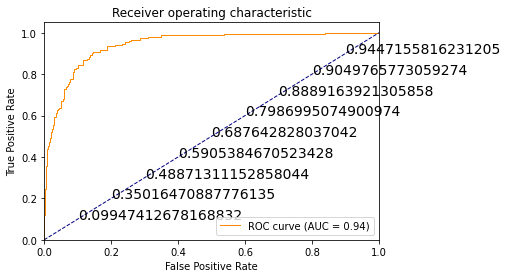

In [71]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, rfc.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (AUC = %0.2f)' % roc_auc)

for label in range(1,10,1):
    plt.text((10-label)/10,(10-label)/10,thresholds[label*15],fontdict={'size': 14})
    
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [72]:
rfc_train_pred = (rfc.predict_proba(X_train)[:,1]>0.5).astype(bool)  
rfc_test_pred = (rfc.predict_proba(X_test)[:,1]>0.5).astype(bool) 

In [73]:
cm0 = confusion_matrix(y_train, log_train_pred,labels=[1,0])
print('Confusion Matrix Train : \n', cm0)

cm1 = confusion_matrix(y_test, log_test_pred,labels=[1,0])
print('Confusion Matrix Test: \n', cm1)

total0=sum(sum(cm0))
total1=sum(sum(cm1))
#####from confusion matrix calculate accuracy
accuracy0=(cm0[0,0]+cm0[1,1])/total0
print ('Accuracy Train : ', accuracy0)

accuracy1=(cm1[0,0]+cm1[1,1])/total1
print ('Accuracy Test : ', accuracy1)

sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', specificity1)

KappaValue=cohen_kappa_score(y_test, log_test_pred)
print("Kappa Value :",KappaValue)
AUC=roc_auc_score(y_test, log_test_pred)
print("AUC         :",AUC)


print("F1-Score Train",f1_score(y_train,log_train_pred))
print("F1-Score Validation : ",f1_score(y_test, log_test_pred))


Confusion Matrix Train : 
 [[ 159  195]
 [  49 3384]]
Confusion Matrix Test: 
 [[  69   83]
 [  23 1448]]
Accuracy Train :  0.9355690520200687
Accuracy Test :  0.9346888478126926
Sensitivity :  0.45394736842105265
Specificity :  0.9843643779741672
Kappa Value : 0.5325613241894991
AUC         : 0.71915587319761
F1-Score Train 0.5658362989323844
F1-Score Validation :  0.5655737704918034


Text(0.5, 1.0, 'Most important Features')

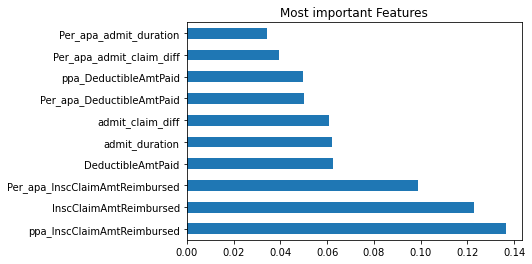

In [74]:
feat_importance = pd.Series(rfc.feature_importances_, index=X.columns)
feat_importance.nlargest(10).plot(kind='barh')
plt.title("Most important Features")